In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("train.CSV")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
new_df_train = pd.DataFrame()
new_df_train = pd.concat([df["1stFlrSF"],df["2ndFlrSF"],df["BedroomAbvGr"],df["FullBath"],df["SalePrice"]],axis=1)
from sklearn.decomposition import PCA
PCA_columns = ['LotArea','YearBuilt','GarageArea']
pca = PCA(n_components=2)
dimen_reduced_columns = pca.fit_transform(df[PCA_columns])
df_pca_train = pd.DataFrame(dimen_reduced_columns)
new_df_train = pd.concat([df_pca_train,new_df_train],axis=1)
new_df_train.rename({'0':'PCA_1','1':'PCA_2'},inplace=True)
new_df_train.columns = new_df_train.columns.astype(str)

In [22]:
new_df_train.head()

,0,1,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,SalePrice
0,-2066.521236,85.046440,856,854,3,2,208500
1,-916.871207,-9.075699,1262,0,3,2,181500
2,733.689712,133.949266,920,866,3,2,223500
3,-966.169850,168.362950,961,756,3,1,140000
4,3744.548626,349.692890,1145,1053,4,2,250000


In [23]:
from sklearn.model_selection import train_test_split
Xtrain = new_df_train.drop(["SalePrice"],axis=1)
Ytrain = new_df_train["SalePrice"]
X_train,X_test,Y_train,Y_test = train_test_split(Xtrain,Ytrain,test_size=0.2,random_state =123)
     

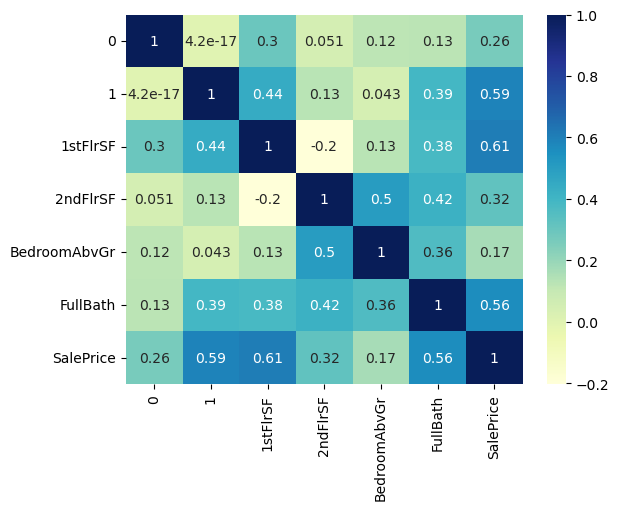

In [24]:
dataplot = sns.heatmap(new_df_train.corr(), cmap="YlGnBu", annot=True)

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(pred,Y_test)

In [29]:
print(mse)

1731817516.395726


In [30]:
r2 = r2_score(pred,Y_test)
r2

0.5075549981974397